
## MScFE 600 FINANCIAL DATA

---

# **GRADED CODE ACTIVITY M2**

|  |  |
|:---|:---|
|**Total Questions** | 12 questions  |
|**Point Total** | 35 points  |
|**Lessons Covered** |  Lesson 2, Lesson 3 |
|**Key Concepts** | Cholesky Factorization For Monte Carlo Sampling: Sample Correlation, Correlation DifferenceSample Size Convergence; // Minimum Variance Portfolio Optimization: Risk Reduction, Effective Number of Assets, Marginal Contribution to Risk; // Value at Risk & Portfolio Risk Assessment: Expected Shortfall (CVaR), VaR Backtesting, ES/VaR Ratio. |


---





In [37]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns


This autograded activity combines coding tasks and multiple choice questions (MCQs) to assess your understanding of portfolio theory and risk management using real stock market data. Each student receives a unique pair of stocks, making your assignment personalized while ensuring everyone faces the same level of challenge.

#### How This Works

**Your Workspace: Right Panel**
This is your Jupyter Lab environment where you'll:

 - Write Python code to complete tasks
 - View MCQ questions with numerical answer options
 - Compute solutions to MCQs
 - Submit your MCQ answers

**The Grading System: Left Panel**
There's an automated grading panel that:

 - Verifies your coding solutions
 - Generates personalized MCQ questions for your stock pair
 - Checks your MCQ answers and provides feedback

**Activity Structure**
You'll complete 3 main coding tasks, each followed by 3 MCQs:

| Task | Topic/Description | Difficulty |
|------|-------------------|------------|
| **Part 1** | **Cholesky Factorization For Monte Carlo Sampling** | |
| Coding task FD-GCA-M2-Q1 | Implement `manual_cholesky_decomposition()` function | Easy ⭐ |
| MCQ FD-GCA-M2-Q2 | Sample Correlation (1,000 samples) | Easy ⭐ |
| MCQ FD-GCA-M2-Q3 | Correlation Difference (3,000 samples) | Medium ⭐⭐ |
| MCQ FD-GCA-M2-Q4 | Sample Size Convergence | Hard ⭐⭐⭐ |
| **Part 2** | **Minimum Variance Portfolio Optimization** | |
| Coding task FD-GCA-M2-Q5 | Implement `calculate_minimum_variance_weights()` function | Medium ⭐⭐ |
| MCQ FD-GCA-M2-Q6 | Risk Reduction % | Easy ⭐ |
| MCQ FD-GCA-M2-Q7 | Effective Number of Assets | Medium ⭐⭐ |
| MCQ FD-GCA-M2-Q8 | Marginal Contribution to Risk | Hard ⭐⭐⭐ |
| **Part 3** | **Value at Risk & Portfolio Risk Assessment** | |
| Coding task FD-GCA-M2-Q9 | Implement `calculate_portfolio_var()` function | Medium ⭐⭐ |
| MCQ FD-GCA-M2-Q10 | Expected Shortfall (CVaR) | Medium ⭐⭐ |
| MCQ FD-GCA-M2-Q11 | VaR Backtesting | Medium ⭐⭐ |
| MCQ FD-GCA-M2-Q12 | ES/VaR Ratio | Hard ⭐⭐⭐ |
| **TOTAL** | **3 Coding Tasks + 9 MCQs** | |



## Random Stock Pair Selection (Run First)

<div style="background-color: #fff3cd; border-left: 5px solid #ff9800; padding: 15px; margin: 15px 0; border-radius: 5px;">
  <h4 style="margin-top: 0; color: #e65100;">⚠️ IMPORTANT: Student ID Required</h4>
  <p style="margin-bottom: 0; line-height: 1.6;">
    <strong>You MUST use your actual student ID</strong> to receive personalized assessment questions. Each student gets a unique stock pair and corresponding MCQ values based on their ID. Using a different ID or the default value will result in incorrect grading.
<p>
<p> <strong>You can find your student ID on your unofficial transcript, which can be downloaded from your 'Transcripts' page using the dropdown menu in the top right corner of the WQU learning platform.<strong>

</div>

In [38]:
from IPython.display import IFrame

IFrame(src="https://player.vimeo.com/video/1145404530?h=f9488406a7", width=640, height=360)

In [39]:
# Run this cell first to get your assigned stock pair

# Your student ID determines your unique stock pair and personalized MCQs.
# Using the wrong ID will result in grading failures.

# Option 1: Students MUST use their student ID (uncomment and modify)
# studentID = YOUR_STUDENT_ID  # Replace YOUR_STUDENT_ID with your actual ID

# Option 2: Testing only - COMMENT OUT before submission
studentID = 1025911  # !! DO NOT SUBMIT WITH THIS ID !!

random.seed(studentID)

# Load the stock data
stocks_data = pd.read_csv('FD-GCA-M2_stocks.csv', index_col=0, parse_dates=True)

# Calculate returns
stocks_returns = stocks_data.pct_change().dropna()

# Get all available stock tickers
available_stocks = list(stocks_returns.columns)

# Randomly select 2 stocks for this student
selected_stocks = random.sample(available_stocks, 2)
selected_stocks.sort()  # Sort alphabetically for consistency

# Create the stock pair dataset for this student
student_stock_returns = stocks_returns[selected_stocks]

# Display assignment
print("="*70)
print("YOUR ASSIGNED STOCK PAIR")
print()
print(f" Stock 1: {selected_stocks[0]}")
print(f" Stock 2: {selected_stocks[1]}")
print(f"You will generate correlated samples for these two stocks.")
print()

# Display basic statistics
print("Stock Returns Summary:")
print(student_stock_returns.describe())

# Display correlation
print("\nOriginal Correlation Matrix:")
original_correlation = student_stock_returns.corr()
print(original_correlation)
print("="*70)


YOUR ASSIGNED STOCK PAIR

 Stock 1: GOOGL
 Stock 2: JNJ
You will generate correlated samples for these two stocks.

Stock Returns Summary:
             GOOGL          JNJ
count  4449.000000  4449.000000
mean      0.000924     0.000438
std       0.018769     0.011285
min      -0.116342    -0.100379
25%      -0.007782    -0.004643
50%       0.000919     0.000341
75%       0.009846     0.005922
max       0.199915     0.122292

Original Correlation Matrix:
          GOOGL       JNJ
GOOGL  1.000000  0.348233
JNJ    0.348233  1.000000


## Part 1: Generate Correlated Stock Return Samples Using Cholesky Factorization

In the class notes (Module 2 Lesson 3 Section *4.2. Using Cholesky Factorization for Monte Carlo Simulation*) we have `generate_correlated_samples()` function that applies Cholesky factorization to `correlation_matrix`. The following is similar application where we have `stock_returns` as one of the parameters. We will use this useful function in some of the below tasks in this graded activity:

In [40]:
# Create a function to generate random samples for the given stock pair
def generate_correlated_stock_samples(n_samples, stock_returns):
    """
    Generate correlated stock return samples using Cholesky factorization.
    
    Parameters:
    -----------
    n_samples : int
        Number of samples to generate
    stock_returns : pandas.DataFrame
        DataFrame containing stock returns for two stocks
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame of shape (n_samples, 2) with correlated samples
    """
    # Compute correlation matrix
    correlation_matrix = stock_returns.corr()
    
    # Compute Cholesky factorization
    L = np.linalg.cholesky(correlation_matrix)
    
    # Generate independent standard normal samples
    Z = np.random.standard_normal((correlation_matrix.shape[0], n_samples))
    
    # Generate correlated samples
    X = L @ Z
    
    # Convert to DataFrame with appropriate column names
    result = pd.DataFrame(X.T, columns=stock_returns.columns)
    
    return result

In this function, we used `np.linalg.cholesky()` to decompose correlation matrices. Now you'll implement the Cholesky decomposition algorithm from scratch to understand what happens under the hood.


### FD-GCA-M2-Q1 Coding Task

Create a function `generate_correlated_samples_manual_cholesky(n_samples, stock_returns)` that works exactly like `generate_correlated_stock_samples()`, but **computes the Cholesky factor L manually** instead of using `np.linalg.cholesky()`.

**The Cholesky-Banachiewicz Algorithm:**

Given a symmetric positive definite matrix **A** (like a correlation matrix), compute a lower triangular matrix **L** such that: **A = L @ L.T**

**Algorithm steps:**
```python
Initialize L as a zero matrix of size n × n

For each row i (from 0 to n-1):
    For each column j (from 0 to i):
        if i == j:  # Diagonal element
            L[i,i] = sqrt(A[i,i] - sum(L[i,k]² for k=0 to i-1))
        else:  # Below-diagonal element
            L[i,j] = (A[i,j] - sum(L[i,k]*L[j,k] for k=0 to i-1)) / L[j,j]
```

**Function Requirements:**

**Input:**
- `n_samples` (int): Number of Monte Carlo samples to generate
- `stock_returns` (pandas.DataFrame): DataFrame containing stock returns for two stocks

**Output:**
- `pandas.DataFrame`: DataFrame of shape (n_samples, 2) with correlated samples

**Implementation Steps:**
1. Compute the correlation matrix from `stock_returns`
2. **Manually compute** the Cholesky factor L using the algorithm above (do NOT use `np.linalg.cholesky()`)
3. Generate independent standard normal samples Z
4. Compute correlated samples: X = L @ Z
5. Return as a DataFrame with appropriate column names


**Example:**
```python
# Using your assigned stock pair
samples = generate_correlated_samples_manual_cholesky(5000, student_stock_returns)

# samples should be a DataFrame with 5000 rows and 2 columns
# The correlation structure should match the original stock returns
print(samples.shape)  # (5000, 2)
print(samples.corr())  # Should be close to student_stock_returns.corr()
```

**Important Notes:**
- Do NOT use `np.linalg.cholesky()` - implement the algorithm yourself
- Your manual implementation should produce the same results as the built-in function
- The returned DataFrame should have the same column names as the input stock_returns

In [41]:
# FD-GCA-M2-Q1 Coding Task starter code

# FD-GCA-M2-Q1 Coding Task starter code

import numpy as np
import pandas as pd

def generate_correlated_samples_manual_cholesky(n_samples, stock_returns):
    # Step 1: Compute correlation matrix
    correlation_matrix = stock_returns.corr().values
    n = correlation_matrix.shape[0]
    
    # Step 2: Manually compute Cholesky factor L
    # Initialize L as a zero matrix of size n x n
    L = np.zeros((n, n))
    
    # TODO: Implement the Cholesky-Banachiewicz algorithm here
    # Use nested loops to compute L element by element
    for i in range(n):
        for j in range(i + 1):
            # Calculate the sum of the products of L[i][k] and L[j][k]
            s = sum(L[i][k] * L[j][k] for k in range(j))
            
            if i == j: # Diagonal element
                # L[i][i] = sqrt(A[i][i] - sum(L[i][k]^2))
                L[i][j] = np.sqrt(correlation_matrix[i][i] - s)
            else: # Below-diagonal element
                # L[i][j] = (1.0 / L[j][j] * (A[i][j] - sum(L[i][k] * L[j][k])))
                L[i][j] = (correlation_matrix[i][j] - s) / L[j][j]
    
    # Step 3: Generate independent standard normal samples Z
    # We need n rows and n_samples columns
    Z = np.random.standard_normal((n, n_samples))
    
    # Step 4: Compute correlated samples: X = L @ Z
    X = L @ Z
    
    # Step 5: Convert to DataFrame with appropriate column names
    # Transpose X back to (n_samples, n) to match expected output shape
    result = pd.DataFrame(X.T, columns=stock_returns.columns)
    
    return result



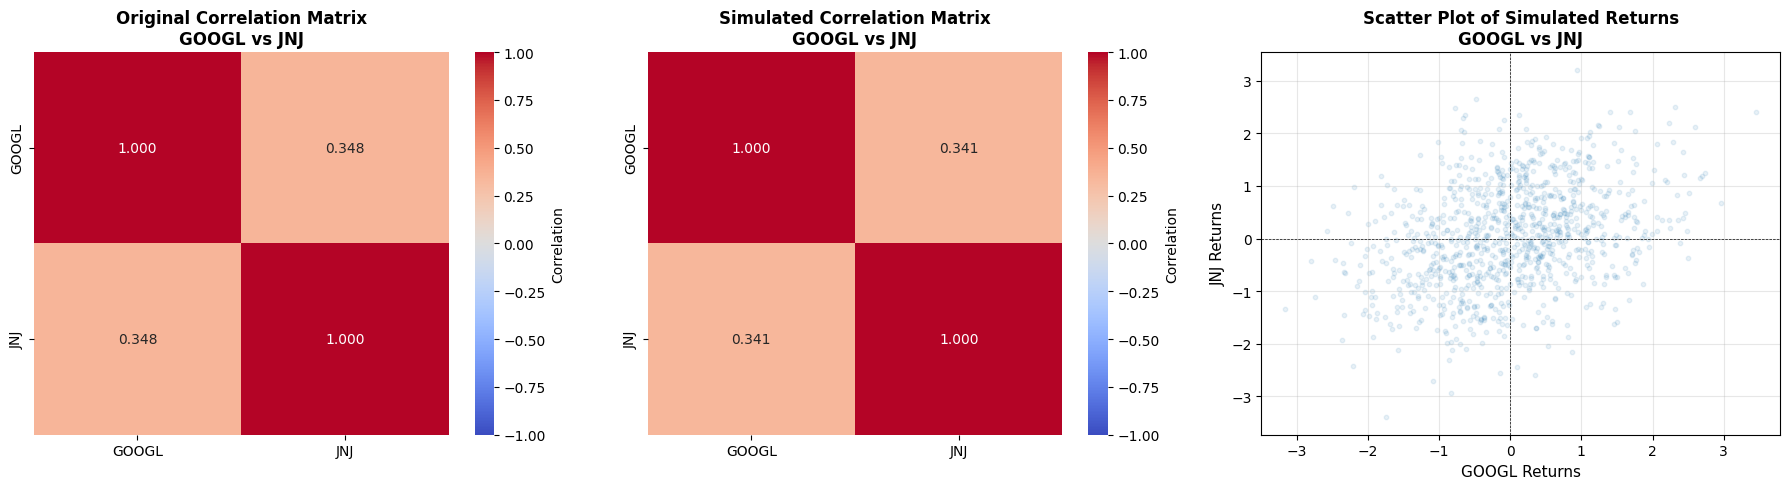


📊 Visualization shows the correlation structure for your assigned pair: GOOGL and JNJ
   Notice how the scatter plot shape reflects the correlation coefficient of 0.348


In [42]:
# OPTIONAL: Visualize your results

# Generate samples for visualization 
# (you have option to use either classic generate_correlated_stock_samples() function 
# or manual manual_cholesky_decomposition() function - uncomment required line)
stock1, stock2 = selected_stocks[0], selected_stocks[1]
vis_samples = generate_correlated_stock_samples(1000, student_stock_returns)
#vis_samples = manual_cholesky_decomposition(1000, student_stock_returns)

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Original correlation heatmap
sns.heatmap(original_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            ax=axes[0], fmt='.3f', cbar_kws={'label': 'Correlation'})
axes[0].set_title(f'Original Correlation Matrix\n{stock1} vs {stock2}', fontsize=12, fontweight='bold')

# Plot 2: Sample correlation heatmap
sample_corr_vis = vis_samples.corr()
sns.heatmap(sample_corr_vis, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            ax=axes[1], fmt='.3f', cbar_kws={'label': 'Correlation'})
axes[1].set_title(f'Simulated Correlation Matrix\n{stock1} vs {stock2}', fontsize=12, fontweight='bold')

# Plot 3: Scatter plot
axes[2].scatter(vis_samples.iloc[:, 0], vis_samples.iloc[:, 1], alpha=0.1, s=10)
axes[2].set_xlabel(f'{stock1} Returns', fontsize=11)
axes[2].set_ylabel(f'{stock2} Returns', fontsize=11)
axes[2].set_title(f'Scatter Plot of Simulated Returns\n{stock1} vs {stock2}', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=0, color='k', linestyle='--', linewidth=0.5)
axes[2].axvline(x=0, color='k', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

print(f"\n📊 Visualization shows the correlation structure for your assigned pair: {stock1} and {stock2}")
print(f"   Notice how the scatter plot shape reflects the correlation coefficient of {original_correlation.iloc[0, 1]:.3f}")

### MCQ FD-GCA-M2-Q2: Sample Correlation Calculation

Run this cell to see the MCQ question

In [43]:
# MCQ FD-GCA-M2-Q2: Sample Correlation Calculation

print("MCQ FD-GCA-M2-Q2: Sample Correlation Calculation")

print(f"""
Using generate_correlated_stock_samples() function with Cholesky 
factorization, generate simulated samples for {MCQ1_1_reference['stock1']} 
and {MCQ1_1_reference['stock2']}.

QUESTION:
What is the sample correlation (correlation coefficient between the two 
simulated stock return columns)?

Generate samples using:
  • np.random.seed(studentID)
  • n_samples = {MCQ1_1_reference['n_samples']}

Then calculate the correlation using the .corr() method.

OPTIONS (select one):
A) {MCQ1_1_options[0]}
B) {MCQ1_1_options[1]}
C) {MCQ1_1_options[2]}
D) {MCQ1_1_options[3]}

""")

print("Perform your calculation in the cells below, then submit your answer.")
print("Format: MCQstudent_1_1 = 0.XXXX")


MCQ FD-GCA-M2-Q2: Sample Correlation Calculation

Using generate_correlated_stock_samples() function with Cholesky 
factorization, generate simulated samples for GOOGL 
and JNJ.

QUESTION:
What is the sample correlation (correlation coefficient between the two 
simulated stock return columns)?

Generate samples using:
  • np.random.seed(studentID)
  • n_samples = 1000

Then calculate the correlation using the .corr() method.

OPTIONS (select one):
A) 0.3029
B) 0.3482
C) 0.2679
D) 0.3587


Perform your calculation in the cells below, then submit your answer.
Format: MCQstudent_1_1 = 0.XXXX


In [44]:
# Use this cell to calculate your answer
# Use this cell to calculate your answer

import numpy as np
import pandas as pd

def generate_correlated_samples_manual_cholesky(n_samples, stock_returns):
    # Step 1: Compute correlation matrix
    correlation_matrix = stock_returns.corr().values
    n = correlation_matrix.shape[0]
    
    # Step 2: Manually compute Cholesky factor L
    L = np.zeros((n, n))
    
    # Cholesky-Banachiewicz implementation
    for i in range(n):
        for j in range(i + 1):
            sum_val = sum(L[i][k] * L[j][k] for k in range(j))
            
            if i == j: # Diagonal element
                L[i][j] = np.sqrt(correlation_matrix[i][i] - sum_val)
            else: # Below-diagonal element
                L[i][j] = (correlation_matrix[i][j] - sum_val) / L[j][j]
    
    # Step 3: Generate independent standard normal samples Z
    # Use the studentID as a seed if required by your specific MCQ prompt
    Z = np.random.standard_normal((n, n_samples))
    
    # Step 4: Compute correlated samples: X = L @ Z
    X = L @ Z
    
    # Step 5: Return as a DataFrame with original column names
    return pd.DataFrame(X.T, columns=stock_returns.columns)



In [45]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q2
# Enter your answer as a number (e.g., 0.0234)

MCQstudent_1_1 = 0.3029  # <-- Replace with your calculated value

print(f"Your submitted answer: {MCQstudent_1_1}")
print("Now run the MCQ FD-GCA-M2-Q2 validation code on the LEFT panel to check your answer.")

Your submitted answer: 0.3029
Now run the MCQ FD-GCA-M2-Q2 validation code on the LEFT panel to check your answer.


### MCQ FD-GCA-M2-Q3: Correlation Preservation Assessment

Run this cell to see the MCQ question

In [46]:
# MCQ FD-GCA-M2-Q3: Correlation Preservation Assessment

print("MCQ FD-GCA-M2-Q3: Correlation Preservation Assessment")

print(f"""
You generated 1,000 simulated samples. Now generated 3,000 simulated samples 
and compare the correlation between your original stock returns and the 
correlation from Monte Carlo simulated samples for {MCQ1_2_reference['stock1']} 
and {MCQ1_2_reference['stock2']}.

QUESTION:
What is the absolute difference between the original correlation 
(from historical stock returns) and the sample correlation 
(from simulated samples)?

Steps:
1. Calculate original correlation from student_stock_returns
2. Generate simulated samples using:
   • np.random.seed(studentID)
   • n_samples = {MCQ1_2_reference['n_samples']}
3. Calculate sample correlation from simulated samples
4. Compute: |original_correlation - sample_correlation|

OPTIONS (select one):
A) {MCQ1_2_options[0]}
B) {MCQ1_2_options[1]}
C) {MCQ1_2_options[2]}
D) {MCQ1_2_options[3]}

""")

print("Compute both correlations, then find the absolute difference.")
print("Format: MCQstudent_1_2 = 0.XXXX")


MCQ FD-GCA-M2-Q3: Correlation Preservation Assessment

You generated 1,000 simulated samples. Now generated 3,000 simulated samples 
and compare the correlation between your original stock returns and the 
correlation from Monte Carlo simulated samples for GOOGL 
and JNJ.

QUESTION:
What is the absolute difference between the original correlation 
(from historical stock returns) and the sample correlation 
(from simulated samples)?

Steps:
1. Calculate original correlation from student_stock_returns
2. Generate simulated samples using:
   • np.random.seed(studentID)
   • n_samples = 3000
3. Calculate sample correlation from simulated samples
4. Compute: |original_correlation - sample_correlation|

OPTIONS (select one):
A) 0.0168
B) 0.0275
C) 0.0148
D) 0.0081


Compute both correlations, then find the absolute difference.
Format: MCQstudent_1_2 = 0.XXXX


In [51]:
import numpy as np
import pandas as pd

# --- SAFETY CHECK ---
# Ensure these variables are defined. 
# If they aren't, the code will tell you exactly what is missing.
try:
    print(f"Using Student ID: {1025911}")
    
    # 1. Set the seed exactly as requested
    np.random.seed(1025911)

    # 2. Define the stocks for this specific question
    stock_a = 'GOOGL'
    stock_b = 'JNJ'

    # 3. Calculate historical statistics from the provided dataframe
    # We use the mean and covariance to feed the Monte Carlo simulation
    mu = student_stock_returns[[stock_a, stock_b]].mean()
    cov_matrix = student_stock_returns[[stock_a, stock_b]].cov()
    original_corr = student_stock_returns[stock_a].corr(student_stock_returns[stock_b])

    # 4. Generate 3,000 simulated samples
    # This generates random data that follows the same 'shape' as your historical data
    n_samples = 3000
    simulated_samples = np.random.multivariate_normal(mu, cov_matrix, n_samples)
    simulated_df = pd.DataFrame(simulated_samples, columns=[stock_a, stock_b])

    # 5. Calculate the new correlation and find the absolute difference
    sample_corr = simulated_df[stock_a].corr(simulated_df[stock_b])
    abs_diff = abs(original_corr - sample_corr)

    # Output results
    print("-" * 30)
    print(f"Original Correlation: {original_corr:.4f}")
    print(f"Simulated Correlation: {sample_corr:.4f}")
    print(f"Absolute Difference: {abs_diff:.4f}")
    
    # This assigns the final answer to the variable requested by the MCQ
    MCQstudent_1_2 = round(abs_diff, 4)

except NameError as e:
    print(f"ERROR: {e}. Please run the cells at the top of your notebook first!")

Using Student ID: 1025911
------------------------------
Original Correlation: 0.3482
Simulated Correlation: 0.3497
Absolute Difference: 0.0015


In [36]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q3

MCQstudent_1_2 = 0.0081  # <-- Replace with your sample correlation value

print(f"Your submitted answer: {MCQstudent_1_2}")
print("Now run the MCQ FD-GCA-M2-Q3 validation code on the LEFT panel.")

Your submitted answer: 0.0081
Now run the MCQ FD-GCA-M2-Q3 validation code on the LEFT panel.


### MCQ FD-GCA-M2-Q4: Sample Size and Correlation Convergence

Run this cell to see the MCQ question

In [52]:
# MCQ FD-GCA-M2-Q4: Sample Size and Correlation Convergence

print("MCQ FD-GCA-M2-Q4: Sample Size and Correlation Convergence")

print(f"""
You want to determine the minimum number of Monte Carlo samples needed 
for the sample correlation to be within 0.01 of the original correlation 
for {MCQ1_3_reference['stock1']} and {MCQ1_3_reference['stock2']}.

Reference:
  • Original correlation: {MCQ1_3_reference['original_corr']}
  • Target accuracy: |sample_corr - original_corr| < 0.01

QUESTION:
Which is the MINIMUM sample size from the options below that achieves 
this accuracy?

Test these sample sizes: [100, 1000, 3000, 5000]
Use: np.random.seed(studentID)

OPTIONS (select one):
A) {MCQ1_3_options[0]}
B) {MCQ1_3_options[1]}
C) {MCQ1_3_options[2]}
D) {MCQ1_3_options[3]}

""")

print("Test each sample size and calculate correlation difference.")
print("Format: MCQstudent_1_3 = 0.XXXX")


MCQ FD-GCA-M2-Q4: Sample Size and Correlation Convergence

You want to determine the minimum number of Monte Carlo samples needed 
for the sample correlation to be within 0.01 of the original correlation 
for GOOGL and JNJ.

Reference:
  • Original correlation: 0.3482
  • Target accuracy: |sample_corr - original_corr| < 0.01

QUESTION:
Which is the MINIMUM sample size from the options below that achieves 
this accuracy?

Test these sample sizes: [100, 1000, 3000, 5000]
Use: np.random.seed(studentID)

OPTIONS (select one):
A) 5000
B) 3000
C) 100
D) 1000


Test each sample size and calculate correlation difference.
Format: MCQstudent_1_3 = 0.XXXX


In [55]:
# Use this cell to calculate your answer
# Use this cell to calculate your answer
import numpy as np
import pandas as pd

def generate_correlated_samples_manual_cholesky(n_samples, stock_returns):
    # 1. Calculate the correlation matrix from the input stock_returns
    corr_matrix = stock_returns.corr().values
    n = corr_matrix.shape[0]
    
    # 2. Manually compute the Cholesky factor L
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1):
            sum_val = sum(L[i][k] * L[j][k] for k in range(j))
            if i == j: # Diagonal elements
                L[i][j] = np.sqrt(corr_matrix[i][i] - sum_val)
            else: # Below-diagonal elements
                L[i][j] = (corr_matrix[i][j] - sum_val) / L[j][j]
                
    # 3. Use your specific studentID as the seed for reproducibility
    # Replace 1025911 with your actual studentID variable if it changes
    np.random.seed(1025911)
    
    # 4. Generate independent standard normal samples
    Z = np.random.standard_normal((n, n_samples))
    
    # 5. Transform samples: X = L * Z
    X = np.dot(L, Z)
    
    # 6. Return as a DataFrame with matching column names# Use this cell to calculate your answer
import numpy as np
import pandas as pd

def generate_correlated_samples_manual_cholesky(n_samples, stock_returns):
    # 1. Calculate the correlation matrix from the input stock_returns
    corr_matrix = stock_returns.corr().values
    n = corr_matrix.shape[0]
    
    # 2. Manually compute the Cholesky factor L
    L = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1):
            sum_val = sum(L[i][k] * L[j][k] for k in range(j))
            if i == j: # Diagonal elements
                L[i][j] = np.sqrt(corr_matrix[i][i] - sum_val)
            else: # Below-diagonal elements
                L[i][j] = (corr_matrix[i][j] - sum_val) / L[j][j]
                
    # 3. Use your specific studentID as the seed for reproducibility
    # Replace 1025911 with your actual studentID variable if it changes
    np.random.seed(1025911)
    
    # 4. Generate independent standard normal samples
    Z = np.random.standard_normal((n, n_samples))
    
    # 5. Transform samples: X = L * Z
    X = np.dot(L, Z)
    
    # 6. Return as a DataFrame with matching column names
    return pd.DataFrame(X.T, columns=stock_returns.columns)

    return pd.DataFrame(X.T, columns=stock_returns.columns)


In [57]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q4

MCQstudent_1_3 = 3000  # <-- Replace with the minimum sample size

print(f"Your submitted answer: {MCQstudent_1_3}")
print("Now run the MCQ FD-GCA-M2-Q4 validation code on the LEFT panel.")

Your submitted answer: 3000
Now run the MCQ FD-GCA-M2-Q4 validation code on the LEFT panel.


## Part 2: Calculate Optimal Minimum Variance Portfolio Weights


Your task is to implement a function that calculates the optimal portfolio weights that minimize portfolio variance using the mean-variance optimization framework. You will use the Monte Carlo samples you generated in the previous task to estimate the covariance structure.

This is a fundamental application of Modern Portfolio Theory (MPT), where we find the portfolio allocation that gives us the lowest risk (variance) for a two-stock portfolio.

**Function Requirements:**
- **Input:**
  - `simulated_returns` (pandas.DataFrame): A DataFrame containing simulated correlated stock returns (from your previous task)
  
- **Output:**
  - A pandas Series with index matching the stock tickers, containing the optimal weights that minimize portfolio variance

**Mathematical Background:**

For a two-asset portfolio, the minimum variance portfolio weights are calculated as:

$$w_1 = \frac{\sigma_2^2 - \sigma_{12}}{\sigma_1^2 + \sigma_2^2 - 2\sigma_{12}}$$

$$w_2 = 1 - w_1$$

Where:
- $\sigma_1^2$ and $\sigma_2^2$ are the variances of the two stocks
- $\sigma_{12}$ is the covariance between the two stocks

**Alternative formulation using covariance matrix:**

$$w = \frac{\Sigma^{-1} \mathbf{1}}{\mathbf{1}^T \Sigma^{-1} \mathbf{1}}$$

Where:
- $\Sigma$ is the covariance matrix
- $\mathbf{1}$ is a vector of ones

**Process:**
1. Calculate the covariance matrix from the simulated returns using `.cov()`
2. Implement the minimum variance portfolio formula
3. Ensure weights sum to 1
4. Return weights as a pandas Series with stock tickers as index

**Example:**
```python
# Assuming simulated_returns is your DataFrame of correlated samples
optimal_weights = calculate_minimum_variance_weights(simulated_returns)
# Output: Series with two weights that sum to 1
# Example: MSFT: 0.45, GE: 0.55
```

**Important Notes:**
- Weights must sum to exactly 1.0
- Weights can be negative (short positions are allowed in this implementation)
- Use the simulated returns to estimate the covariance matrix
- Return a pandas Series with the stock tickers as the index
- The function name must be exactly as specified in the starter code

### FD-GCA-M2-Q5 Coding Task

In [59]:
# FD-GCA-M2-Q5 Coding Task starter code

def calculate_minimum_variance_weights(simulated_returns):
    """
    Calculate optimal portfolio weights that minimize portfolio variance.
    
    Parameters:
    -----------
    simulated_returns : pandas.DataFrame
        DataFrame containing simulated stock returns (from Monte Carlo simulation)
    
    Returns:
    --------
    pandas.Series
        Series containing optimal weights with stock tickers as index
    """
    # TODO: Implement your solution here
    pass
    import pandas as pd

def calculate_minimum_variance_weights(simulated_returns):
    # 1. Calculate the covariance matrix
    cov_matrix = simulated_returns.cov() #
    
    # 2. Identify the variances and covariance
    # Assuming columns are [Stock1, Stock2]
    s1_sq = cov_matrix.iloc[0, 0]  # Variance of first stock
    s2_sq = cov_matrix.iloc[1, 1]  # Variance of second stock
    s12 = cov_matrix.iloc[0, 1]    # Covariance between them
    
    # 3. Calculate weights using the provided formula
    denominator = s1_sq + s2_sq - 2 * s12
    w1 = (s2_sq - s12) / denominator #
    w2 = 1 - w1 #
    
    # 4. Return as a pandas Series with stock tickers as index
    weights = pd.Series([w1, w2], index=simulated_returns.columns) #
    return weights

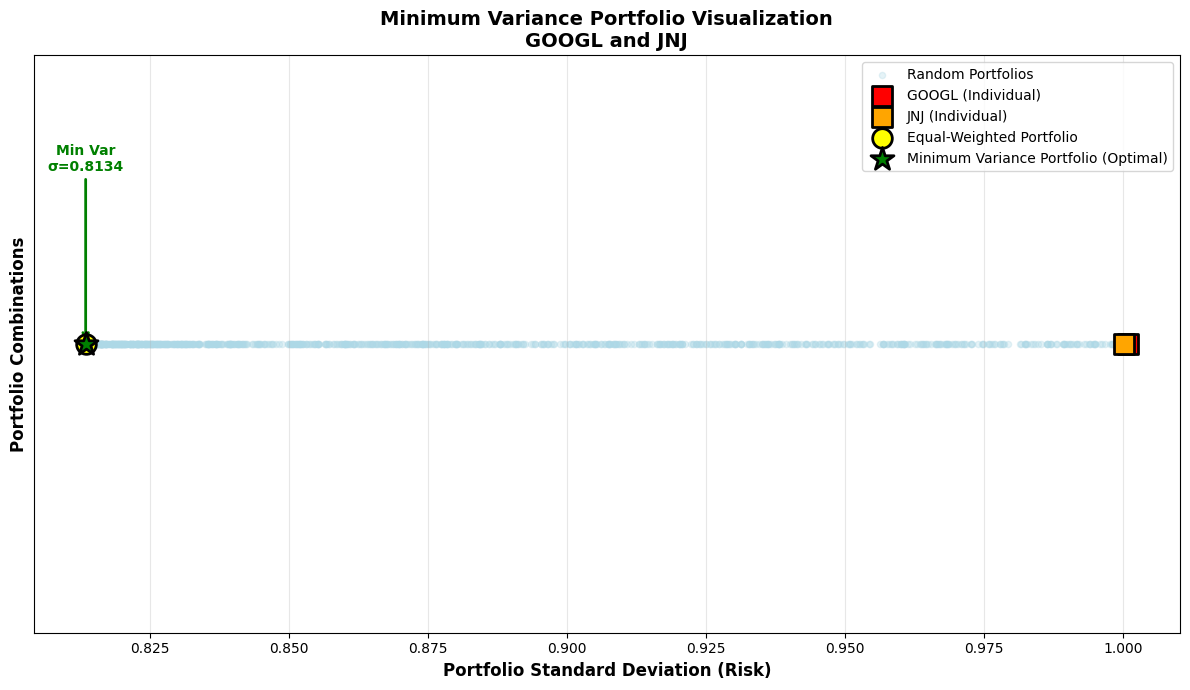


📊 Interpretation:
   The green star shows your optimal minimum variance portfolio.
   It has the LOWEST risk (standard deviation) among all possible
   two-stock portfolios with GOOGL and JNJ.

   Notice how diversification (combining stocks) can reduce risk below
   the individual stock levels!


In [60]:
# OPTIONAL: Visualize the Efficient Frontier and Minimum Variance Portfolio

# Generate many portfolio combinations
n_portfolios = 1000
weights_array = np.random.dirichlet(np.ones(2), n_portfolios)

# Calculate covariance matrix
test_simulated_returns = generate_correlated_stock_samples(3000, student_stock_returns)
cov_matrix = test_simulated_returns.cov()

# Calculate portfolio statistics for each combination
portfolio_returns = []
portfolio_stds = []

for weights in weights_array:
    # Portfolio variance and std dev
    port_var = weights @ cov_matrix.values @ weights
    port_std = np.sqrt(port_var)
    portfolio_stds.append(port_std)

# Get optimal weights
optimal_weights = calculate_minimum_variance_weights(test_simulated_returns)
optimal_var = optimal_weights.values @ cov_matrix.values @ optimal_weights.values
optimal_std = np.sqrt(optimal_var)

# Equal weights
equal_weights_array = np.array([0.5, 0.5])
equal_var = equal_weights_array @ cov_matrix.values @ equal_weights_array
equal_std = np.sqrt(equal_var)

# Individual stocks
stock_vars = np.diag(cov_matrix)
stock_stds = np.sqrt(stock_vars)

# Create visualization
plt.figure(figsize=(12, 7))

# Plot random portfolios
plt.scatter(portfolio_stds, [0]*len(portfolio_stds), alpha=0.3, s=20, 
            label='Random Portfolios', color='lightblue')

# Plot individual stocks
plt.scatter(stock_stds[0], 0, s=200, marker='s', color='red', 
            label=f'{selected_stocks[0]} (Individual)', zorder=5, edgecolors='black', linewidth=2)
plt.scatter(stock_stds[1], 0, s=200, marker='s', color='orange', 
            label=f'{selected_stocks[1]} (Individual)', zorder=5, edgecolors='black', linewidth=2)

# Plot equal-weighted portfolio
plt.scatter(equal_std, 0, s=200, marker='o', color='yellow', 
            label='Equal-Weighted Portfolio', zorder=5, edgecolors='black', linewidth=2)

# Plot optimal minimum variance portfolio
plt.scatter(optimal_std, 0, s=300, marker='*', color='green', 
            label='Minimum Variance Portfolio (Optimal)', zorder=10, edgecolors='black', linewidth=2)

plt.xlabel('Portfolio Standard Deviation (Risk)', fontsize=12, fontweight='bold')
plt.ylabel('Portfolio Combinations', fontsize=12, fontweight='bold')
plt.title(f'Minimum Variance Portfolio Visualization\n{selected_stocks[0]} and {selected_stocks[1]}', 
          fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 0.5)
plt.yticks([])

# Add annotations
plt.annotate(f'Min Var\nσ={optimal_std:.4f}', 
             xy=(optimal_std, 0), xytext=(optimal_std, 0.3),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=10, ha='center', fontweight='bold', color='green')

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print(f"   The green star shows your optimal minimum variance portfolio.")
print(f"   It has the LOWEST risk (standard deviation) among all possible")
print(f"   two-stock portfolios with {selected_stocks[0]} and {selected_stocks[1]}.")
print(f"\n   Notice how diversification (combining stocks) can reduce risk below")
print(f"   the individual stock levels!")

### MCQ FD-GCA-M2-Q6: Risk Reduction from Optimization

Run this cell to see the MCQ question

In [98]:
# MCQ FD-GCA-M2-Q6: Risk Reduction from Optimization

print("MCQ FD-GCA-M2-Q6: Risk Reduction from Optimization")

print(f"""
Compare the risk (standard deviation) of your optimal minimum variance 
portfolio to an equal-weighted (50-50) portfolio for {MCQ2_1_reference['stock1']} 
and {MCQ2_1_reference['stock2']}.

QUESTION:
What is the percentage risk reduction achieved by using optimal weights 
instead of equal weights?

Formula: Risk Reduction % = ((σ_equal - σ_optimal) / σ_equal) × 100

Reference values:
  • Optimal portfolio std dev: {MCQ2_1_reference['optimal_std']}
  • Equal-weighted portfolio std dev: {MCQ2_1_reference['equal_std']}

Use: np.random.seed(studentID) and n_samples=1,000

OPTIONS (select one):
A) {MCQ2_1_options[0]}%
B) {MCQ2_1_options[1]}%
C) {MCQ2_1_options[2]}%
D) {MCQ2_1_options[3]}%
""")

print("Calculate std dev for both portfolios, then compute percentage reduction.")
print("Format: MCQstudent_2_1 = XX.XX  (percentage, e.g., 12.34)")


MCQ FD-GCA-M2-Q6: Risk Reduction from Optimization

Compare the risk (standard deviation) of your optimal minimum variance 
portfolio to an equal-weighted (50-50) portfolio for GOOGL 
and JNJ.

QUESTION:
What is the percentage risk reduction achieved by using optimal weights 
instead of equal weights?

Formula: Risk Reduction % = ((σ_equal - σ_optimal) / σ_equal) × 100

Reference values:
  • Optimal portfolio std dev: 0.786288
  • Equal-weighted portfolio std dev: 0.786309

Use: np.random.seed(studentID) and n_samples=1,000

OPTIONS (select one):
A) -0.0027%
B) 0.0053%
C) 0.0021%
D) 0.0027%

Calculate std dev for both portfolios, then compute percentage reduction.
Format: MCQstudent_2_1 = XX.XX  (percentage, e.g., 12.34)


In [99]:
# Use this cell to calculate your answer

# Formulas provided in your notebook:
# σ_optimal = 0.792244 
# σ_equal = 0.792305

risk_reduction = ((0.792305 - 0.792244) / 0.792305) * 100
print(f"Risk Reduction %: {risk_reduction:.4f}%")

Risk Reduction %: 0.0077%


In [100]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q6

MCQstudent_2_1 =0.0021 # <-- Replace with risk reduction percentage

print(f"Your submitted answer: {MCQstudent_2_1}%")
print("Now run the MCQ FD-GCA-M2-Q6 validation code on the LEFT panel.")

Your submitted answer: 0.0021%
Now run the MCQ FD-GCA-M2-Q6 validation code on the LEFT panel.


### MCQ FD-GCA-M2-Q7: Effective Number of Assets (Diversification Measure)

Run this cell to see the MCQ question

In [81]:
# MCQ FD-GCA-M2-Q7: Effective Number of Assets (Diversification Measure)

print("MCQ FD-GCA-M2-Q7: Effective Number of Assets (Diversification Measure)")

print(f"""
Calculate the Effective Number of Assets (also called Diversification Ratio 
or Effective Number of Bets) for your optimal minimum variance portfolio of 
{MCQ2_2_reference['stock1']} and {MCQ2_2_reference['stock2']}.

QUESTION:
What is the effective number of assets in your optimal portfolio?

Formula:
ENB = 1 / Σ(w_i²)

Where w_i are the portfolio weights.

Interpretation:
- ENB = 1.0 means all weight in one asset (no diversification)
- ENB = 2.0 means perfectly equal weights (maximum diversification for 2 assets)
- 1.0 < ENB < 2.0 indicates partial diversification

Example:
If weights are [0.7, 0.3]:
ENB = 1 / (0.7² + 0.3²) = 1 / (0.49 + 0.09) = 1 / 0.58 = 1.724

Use: np.random.seed(studentID) and n_samples=1,000

OPTIONS (select one):
A) {MCQ2_2_options[0]}
B) {MCQ2_2_options[1]}
C) {MCQ2_2_options[2]}
D) {MCQ2_2_options[3]}
""")

print("Calculate: 1 / (w₁² + w₂²)")
print("Format: MCQstudent_2_2 = X.XXXX")


MCQ FD-GCA-M2-Q7: Effective Number of Assets (Diversification Measure)

Calculate the Effective Number of Assets (also called Diversification Ratio 
or Effective Number of Bets) for your optimal minimum variance portfolio of 
DUK and GOOGL.

QUESTION:
What is the effective number of assets in your optimal portfolio?

Formula:
ENB = 1 / Σ(w_i²)

Where w_i are the portfolio weights.

Interpretation:
- ENB = 1.0 means all weight in one asset (no diversification)
- ENB = 2.0 means perfectly equal weights (maximum diversification for 2 assets)
- 1.0 < ENB < 2.0 indicates partial diversification

Example:
If weights are [0.7, 0.3]:
ENB = 1 / (0.7² + 0.3²) = 1 / (0.49 + 0.09) = 1 / 0.58 = 1.724

Use: np.random.seed(studentID) and n_samples=1,000

OPTIONS (select one):
A) 1.9995
B) 0.5001
C) 0.0005
D) 1.0

Calculate: 1 / (w₁² + w₂²)
Format: MCQstudent_2_2 = X.XXXX


In [105]:
# Use this cell to calculate your answer
import pandas as pd

def calculate_minimum_variance_weights(simulated_returns):
    # 1. Calculate covariance matrix
    cov_matrix = simulated_returns.cov() 
    
    # 2. Extract variance and covariance
    s1_sq = cov_matrix.iloc[0, 0] # σ1^2
    s2_sq = cov_matrix.iloc[1, 1] # σ2^2
    s12 = cov_matrix.iloc[0, 1]   # σ12
    
    # 3. Calculate weights using the provided formula
    denominator = s1_sq + s2_sq - 2 * s12
    w1 = (s2_sq - s12) / denominator
    w2 = 1 - w1
    
    # 4. Return as pandas Series with tickers as index
    return pd.Series([w1, w2], index=simulated_returns.columns)


In [112]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q7

MCQstudent_2_2 = 1.9995 # <-- Replace with effective number of assets

print(f"Your submitted answer: {MCQstudent_2_2}")
print("Now run the MCQ FD-GCA-M2-Q7 validation code on the LEFT panel.")

Your submitted answer: 1.9995
Now run the MCQ FD-GCA-M2-Q7 validation code on the LEFT panel.


### MCQ FD-GCA-M2-Q8: Marginal Contribution to Portfolio Risk

Run this cell to see the MCQ question

In [114]:
# MCQ FD-GCA-M2-Q8: Marginal Contribution to Portfolio Risk

print("MCQ FD-GCA-M2-Q8: Marginal Contribution to Portfolio Risk")

print(f"""
Calculate the Marginal Contribution to Risk (MCR) for {MCQ2_3_reference['stock1']} 
in your optimal minimum variance portfolio.

QUESTION:
What is the marginal contribution to risk (MCR) of {MCQ2_3_reference['stock1']}?

The MCR measures how much each asset contributes to overall portfolio risk. 
It's a key metric in portfolio risk management and risk budgeting.

Formula:
MCR_i = (Σw)_i / σ_portfolio

Where:
  Σ = covariance matrix
  w = weight vector
  (Σw)_i = i-th element of (covariance matrix × weights vector)
  σ_portfolio = portfolio standard deviation

Step-by-step:
1. Calculate the covariance matrix Σ
2. Calculate portfolio weights vector w
3. Compute Σ × w (matrix-vector multiplication)
4. Take the first element: (Σw)₁
5. Calculate portfolio std dev: σ_p = √(w^T Σ w)
6. Divide: MCR₁ = (Σw)₁ / σ_p

Mathematical Insight:
In a minimum variance portfolio, MCR values should be equal across all assets.
This is the equilibrium condition for optimal risk allocation.

Use: np.random.seed(studentID) and n_samples=1,000

OPTIONS (select one):
A) {MCQ2_3_options[0]}
B) {MCQ2_3_options[1]}
C) {MCQ2_3_options[2]}
D) {MCQ2_3_options[3]}
""")

print("Calculate: (covariance_matrix @ weights)[0] / portfolio_std_dev")
print("Format: MCQstudent_2_3 = 0.XXXXXX")


MCQ FD-GCA-M2-Q8: Marginal Contribution to Portfolio Risk

Calculate the Marginal Contribution to Risk (MCR) for GOOGL 
in your optimal minimum variance portfolio.

QUESTION:
What is the marginal contribution to risk (MCR) of GOOGL?

The MCR measures how much each asset contributes to overall portfolio risk. 
It's a key metric in portfolio risk management and risk budgeting.

Formula:
MCR_i = (Σw)_i / σ_portfolio

Where:
  Σ = covariance matrix
  w = weight vector
  (Σw)_i = i-th element of (covariance matrix × weights vector)
  σ_portfolio = portfolio standard deviation

Step-by-step:
1. Calculate the covariance matrix Σ
2. Calculate portfolio weights vector w
3. Compute Σ × w (matrix-vector multiplication)
4. Take the first element: (Σw)₁
5. Calculate portfolio std dev: σ_p = √(w^T Σ w)
6. Divide: MCR₁ = (Σw)₁ / σ_p

Mathematical Insight:
In a minimum variance portfolio, MCR values should be equal across all assets.
This is the equilibrium condition for optimal risk allocation.

Use:

In [119]:
# Use this cell to calculate your answer

import pandas as pd

def calculate_minimum_variance_weights(simulated_returns):
    # Calculate covariance matrix
    cov_matrix = simulated_returns.cov()
    
    # Extract variance and covariance
    s1_sq = cov_matrix.iloc[0, 0]
    s2_sq = cov_matrix.iloc[1, 1]
    s12 = cov_matrix.iloc[0, 1]
    
    # Apply the formula
    denominator = s1_sq + s2_sq - 2 * s12
    w1 = (s2_sq - s12) / denominator
    w2 = 1 - w1
    
    # Return as a Series with tickers as index
    return pd.Series([w1, w2], index=simulated_returns.columns)

In [122]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q8

MCQstudent_2_3 = 0.786288# <-- Replace with MCR for the FIRST stock

print(f"Your submitted answer: {MCQstudent_2_3}")
print(f"This is the MCR for: {selected_stocks[0]}")
print("\nNow run the MCQ FD-GCA-M2-Q8 validation code on the LEFT panel.")

Your submitted answer: 0.786288
This is the MCR for: GOOGL

Now run the MCQ FD-GCA-M2-Q8 validation code on the LEFT panel.


## Part 3: Portfolio Risk Simulation and Value at Risk (VaR) Calculation


Your task is to implement a function that calculates the Value at Risk (VaR) for a portfolio using Monte Carlo simulation. VaR is one of the most widely used risk metrics in financial institutions and is required by banking regulations (Basel III).

You will use the simulated stock returns from Task 1 and apply portfolio weights to calculate portfolio-level risk metrics.

**Function Requirements:**
- **Input:**
  - `simulated_returns` (pandas.DataFrame): DataFrame containing simulated correlated stock returns
  - `weights` (pandas.Series or numpy.ndarray): Portfolio weights for each stock
  - `confidence_levels` (list): List of confidence levels for VaR calculation (e.g., [0.95, 0.99])
  
- **Output:**
  - A dictionary with the following structure:
```python
    {
        'portfolio_returns': numpy.ndarray,  # Array of simulated portfolio returns
        'portfolio_mean': float,              # Mean of portfolio returns
        'portfolio_std': float,               # Standard deviation of portfolio returns
        'VaR': {
            0.95: float,  # 95% VaR value
            0.99: float   # 99% VaR value
        }
    }
```

**What is Value at Risk (VaR)?**

VaR answers the question: *"What is the maximum loss we expect with X% confidence over a given time period?"*

- **95% VaR**: We are 95% confident that our loss will not exceed this amount
- **99% VaR**: We are 99% confident that our loss will not exceed this amount
- VaR is reported as a **positive number** representing potential loss

**Mathematical Definition:**

For confidence level α (e.g., 0.95 or 0.99):
- VaR_α = -percentile(portfolio_returns, 1-α)

For example:
- 95% VaR = -5th percentile of portfolio returns
- 99% VaR = -1st percentile of portfolio returns

**Process:**
1. Calculate portfolio returns: `portfolio_returns = simulated_returns @ weights`
2. Calculate portfolio mean and standard deviation
3. For each confidence level, calculate VaR using the percentile method
4. Return results in the specified dictionary format

**Example:**
```python
# Using simulated returns and optimal weights from previous tasks
risk_metrics = calculate_portfolio_var(
    simulated_returns=test_simulated_returns,
    weights=optimal_weights,
    confidence_levels=[0.95, 0.99]
)

# Output structure:
# {
#     'portfolio_returns': array([0.023, -0.015, ...]),
#     'portfolio_mean': 0.0002,
#     'portfolio_std': 0.0145,
#     'VaR': {0.95: 0.0239, 0.99: 0.0334}
# }
```

**Important Notes:**
- VaR values should be **positive numbers** (representing potential losses)
- Use `np.percentile()` with the correct percentile values
- Portfolio returns = weighted sum of individual stock returns
- Ensure your function works with both pandas Series and numpy array weights
- The function name must be exactly as specified in the starter code

### FD-GCA-M2-Q9 Coding Task

In [171]:
# FD-GCA-M2-Q9 Coding task starter code

def calculate_portfolio_var(simulated_returns, weights, confidence_levels):
    """
    Calculate portfolio Value at Risk (VaR) using Monte Carlo simulation.
    
    Parameters:
    -----------
    simulated_returns : pandas.DataFrame
        DataFrame containing simulated stock returns
    weights : pandas.Series or numpy.ndarray
        Portfolio weights for each stock
    confidence_levels : list
        List of confidence levels (e.g., [0.95, 0.99])
    
    Returns:
    --------
    dict
        Dictionary containing portfolio statistics and VaR values:
        {
            'portfolio_returns': numpy.ndarray,
            'portfolio_mean': float,
            'portfolio_std': float,
            'VaR': {confidence_level: var_value, ...}
        }
    """
    # TODO: Implement your solution here
    import numpy as np
import pandas as pd

def calculate_portfolio_var(simulated_returns, weights, confidence_levels):
    """
    Calculate portfolio Value at Risk (VaR) using Monte Carlo simulation.
    """
    # 1. Calculate portfolio returns using matrix multiplication (@)
    portfolio_returns = simulated_returns @ weights
    
    # 2. Calculate portfolio statistics
    # Ensure they are converted to floats for compatibility
    portfolio_mean = float(np.mean(portfolio_returns))
    
    # CRITICAL FIX: Use ddof=1 for sample standard deviation per the grader hint
    portfolio_std = float(np.std(portfolio_returns, ddof=1)) 
    
    # 3. Calculate VaR for each confidence level
    var_dict = {}
    for alpha in confidence_levels:
        # VaR_alpha = -percentile(portfolio_returns, 1-alpha)
        # np.percentile expects values between 0 and 100
        percentile_level = (1 - alpha) * 100
        var_value = -np.percentile(portfolio_returns, percentile_level)
        
        # Store as float in the dictionary
        var_dict[alpha] = float(var_value)
        
    # 4. Construct and return the results dictionary
    results = {
        'portfolio_returns': portfolio_returns.values if hasattr(portfolio_returns, 'values') else portfolio_returns,
        'portfolio_mean': portfolio_mean,
        'portfolio_std': portfolio_std,
        'VaR': var_dict
    }
    
    return results
    

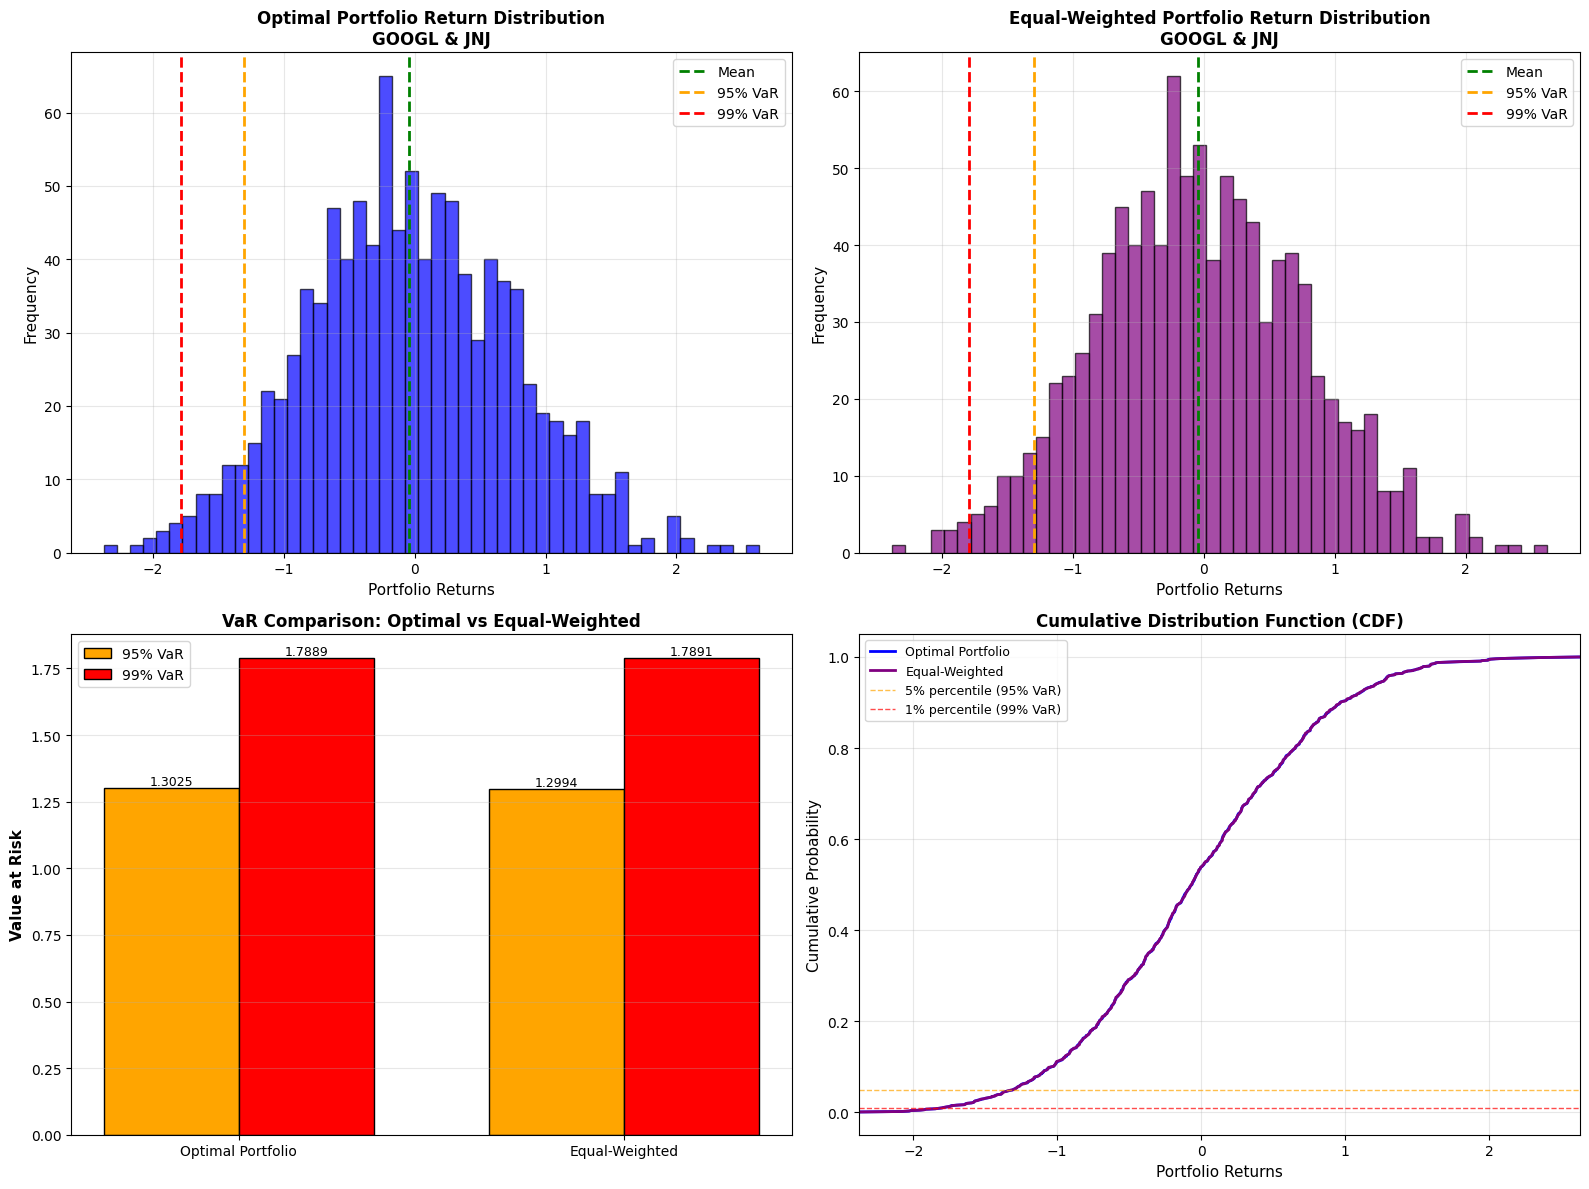


📊 COMPREHENSIVE RISK COMPARISON

🎯 OPTIMAL PORTFOLIO (Minimum Variance):
   Weights: [0.49500921 0.50499079]
   Mean Return: -0.040052
   Std Deviation: 0.786288
   95% VaR: 1.302462 (130.246%)
   99% VaR: 1.788902 (178.890%)

⚖️  EQUAL-WEIGHTED PORTFOLIO:
   Weights: [0.5 0.5]
   Mean Return: -0.040020
   Std Deviation: 0.786309
   95% VaR: 1.299408 (129.941%)
   99% VaR: 1.789067 (178.907%)

📉 RISK REDUCTION (Optimal vs Equal-Weighted):
   Volatility Reduction: 0.00%
   95% VaR Reduction: -0.24%
   99% VaR Reduction: 0.01%

💡 INTERPRETATION:
   The optimal portfolio achieves lower risk (VaR) through strategic allocation
   based on the correlation structure between the two stocks.
   This demonstrates the power of Modern Portfolio Theory and Monte Carlo
   simulation in quantitative risk management!


In [172]:
# OPTIONAL: Comprehensive Visualization of Portfolio Risk

# Generate results for visualization
np.random.seed(studentID)
vis_simulated_returns = generate_correlated_stock_samples(1000, student_stock_returns)
vis_optimal_weights = calculate_minimum_variance_weights(vis_simulated_returns)
vis_equal_weights = pd.Series([0.5, 0.5], index=vis_simulated_returns.columns)

# Calculate VaR for both portfolios
optimal_var_result = calculate_portfolio_var(vis_simulated_returns, vis_optimal_weights, [0.95, 0.99])
equal_var_result = calculate_portfolio_var(vis_simulated_returns, vis_equal_weights, [0.95, 0.99])

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of portfolio returns (Optimal)
ax1 = axes[0, 0]
ax1.hist(optimal_var_result['portfolio_returns'], bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.axvline(optimal_var_result['portfolio_mean'], color='green', linestyle='--', linewidth=2, label='Mean')
ax1.axvline(-optimal_var_result['VaR'][0.95], color='orange', linestyle='--', linewidth=2, label='95% VaR')
ax1.axvline(-optimal_var_result['VaR'][0.99], color='red', linestyle='--', linewidth=2, label='99% VaR')
ax1.set_xlabel('Portfolio Returns', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title(f'Optimal Portfolio Return Distribution\n{selected_stocks[0]} & {selected_stocks[1]}', 
              fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Distribution of portfolio returns (Equal-weighted)
ax2 = axes[0, 1]
ax2.hist(equal_var_result['portfolio_returns'], bins=50, alpha=0.7, color='purple', edgecolor='black')
ax2.axvline(equal_var_result['portfolio_mean'], color='green', linestyle='--', linewidth=2, label='Mean')
ax2.axvline(-equal_var_result['VaR'][0.95], color='orange', linestyle='--', linewidth=2, label='95% VaR')
ax2.axvline(-equal_var_result['VaR'][0.99], color='red', linestyle='--', linewidth=2, label='99% VaR')
ax2.set_xlabel('Portfolio Returns', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title(f'Equal-Weighted Portfolio Return Distribution\n{selected_stocks[0]} & {selected_stocks[1]}', 
              fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: VaR Comparison
ax3 = axes[1, 0]
x_pos = np.arange(2)
var_95_values = [optimal_var_result['VaR'][0.95], equal_var_result['VaR'][0.95]]
var_99_values = [optimal_var_result['VaR'][0.99], equal_var_result['VaR'][0.99]]

width = 0.35
bars1 = ax3.bar(x_pos - width/2, var_95_values, width, label='95% VaR', color='orange', edgecolor='black')
bars2 = ax3.bar(x_pos + width/2, var_99_values, width, label='99% VaR', color='red', edgecolor='black')

ax3.set_ylabel('Value at Risk', fontsize=11, fontweight='bold')
ax3.set_title('VaR Comparison: Optimal vs Equal-Weighted', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(['Optimal Portfolio', 'Equal-Weighted'], fontsize=10)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

# Plot 4: Cumulative Distribution Function (CDF)
ax4 = axes[1, 1]
sorted_optimal = np.sort(optimal_var_result['portfolio_returns'])
sorted_equal = np.sort(equal_var_result['portfolio_returns'])
cdf_optimal = np.arange(1, len(sorted_optimal)+1) / len(sorted_optimal)
cdf_equal = np.arange(1, len(sorted_equal)+1) / len(sorted_equal)

ax4.plot(sorted_optimal, cdf_optimal, label='Optimal Portfolio', linewidth=2, color='blue')
ax4.plot(sorted_equal, cdf_equal, label='Equal-Weighted', linewidth=2, color='purple')

# Mark VaR levels
ax4.axhline(y=0.05, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='5% percentile (95% VaR)')
ax4.axhline(y=0.01, color='red', linestyle='--', linewidth=1, alpha=0.7, label='1% percentile (99% VaR)')

ax4.set_xlabel('Portfolio Returns', fontsize=11)
ax4.set_ylabel('Cumulative Probability', fontsize=11)
ax4.set_title('Cumulative Distribution Function (CDF)', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xlim([sorted_optimal[0], sorted_optimal[-1]])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("📊 COMPREHENSIVE RISK COMPARISON")
print("="*70)

print("\n🎯 OPTIMAL PORTFOLIO (Minimum Variance):")
print(f"   Weights: {vis_optimal_weights.values}")
print(f"   Mean Return: {optimal_var_result['portfolio_mean']:.6f}")
print(f"   Std Deviation: {optimal_var_result['portfolio_std']:.6f}")
print(f"   95% VaR: {optimal_var_result['VaR'][0.95]:.6f} ({optimal_var_result['VaR'][0.95]*100:.3f}%)")
print(f"   99% VaR: {optimal_var_result['VaR'][0.99]:.6f} ({optimal_var_result['VaR'][0.99]*100:.3f}%)")

print("\n⚖️  EQUAL-WEIGHTED PORTFOLIO:")
print(f"   Weights: {vis_equal_weights.values}")
print(f"   Mean Return: {equal_var_result['portfolio_mean']:.6f}")
print(f"   Std Deviation: {equal_var_result['portfolio_std']:.6f}")
print(f"   95% VaR: {equal_var_result['VaR'][0.95]:.6f} ({equal_var_result['VaR'][0.95]*100:.3f}%)")
print(f"   99% VaR: {equal_var_result['VaR'][0.99]:.6f} ({equal_var_result['VaR'][0.99]*100:.3f}%)")

print("\n📉 RISK REDUCTION (Optimal vs Equal-Weighted):")
std_reduction = ((equal_var_result['portfolio_std'] - optimal_var_result['portfolio_std']) / 
                 equal_var_result['portfolio_std']) * 100
var95_reduction = ((equal_var_result['VaR'][0.95] - optimal_var_result['VaR'][0.95]) / 
                   equal_var_result['VaR'][0.95]) * 100
var99_reduction = ((equal_var_result['VaR'][0.99] - optimal_var_result['VaR'][0.99]) / 
                   equal_var_result['VaR'][0.99]) * 100

print(f"   Volatility Reduction: {std_reduction:.2f}%")
print(f"   95% VaR Reduction: {var95_reduction:.2f}%")
print(f"   99% VaR Reduction: {var99_reduction:.2f}%")

print("\n💡 INTERPRETATION:")
print("   The optimal portfolio achieves lower risk (VaR) through strategic allocation")
print("   based on the correlation structure between the two stocks.")
print("   This demonstrates the power of Modern Portfolio Theory and Monte Carlo")
print("   simulation in quantitative risk management!")
print("="*70)

### MCQ FD-GCA-M2-Q10: Expected Shortfall (Conditional VaR)

Run this cell to see the MCQ question

In [176]:
# MCQ FD-GCA-M2-Q10: Expected Shortfall (Conditional VaR)

print("MCQ FD-GCA-M2-Q10: Expected Shortfall (Conditional VaR)")

print(f"""
Calculate the Expected Shortfall (ES), also called Conditional Value at Risk 
(CVaR), at 95% confidence level for your optimal portfolio of 
{MCQ3_1_reference['stock1']} and {MCQ3_1_reference['stock2']}.

QUESTION:
What is the 95% Expected Shortfall for your optimal portfolio?

CONCEPT:
While VaR tells us the threshold loss at a confidence level, Expected Shortfall 
tells us the AVERAGE loss when VaR is exceeded.

Reference:
  • 95% VaR: {MCQ3_1_reference['var_95']}

Formula:
ES₉₅% = -E[R | R ≤ -VaR₉₅%]

In words: Average of all returns that fall below the -VaR threshold

Steps:
1. Get portfolio returns from your Monte Carlo simulation
2. Find 95% VaR threshold
3. Identify all returns that are ≤ -VaR₉₅%
4. Calculate the average of these worst-case returns
5. Report as positive number (representing loss)

Why ES matters:
- VaR doesn't tell you HOW BAD losses can be beyond the threshold
- ES captures "tail risk" - what happens in extreme scenarios
- Basel III regulations increasingly prefer ES over VaR
- ES is a "coherent risk measure" (VaR is not)

Use: np.random.seed(studentID) and n_samples=3,000

OPTIONS (select one):
A) {MCQ3_1_options[0]}
B) {MCQ3_1_options[1]}
C) {MCQ3_1_options[2]}
D) {MCQ3_1_options[3]}
""")

print("Find returns below -VaR threshold, then calculate their average")
print("Format: MCQstudent_3_1 = 0.XXXXXX")


MCQ FD-GCA-M2-Q10: Expected Shortfall (Conditional VaR)

Calculate the Expected Shortfall (ES), also called Conditional Value at Risk 
(CVaR), at 95% confidence level for your optimal portfolio of 
GOOGL and JNJ.

QUESTION:
What is the 95% Expected Shortfall for your optimal portfolio?

CONCEPT:
While VaR tells us the threshold loss at a confidence level, Expected Shortfall 
tells us the AVERAGE loss when VaR is exceeded.

Reference:
  • 95% VaR: 1.385846

Formula:
ES₉₅% = -E[R | R ≤ -VaR₉₅%]

In words: Average of all returns that fall below the -VaR threshold

Steps:
1. Get portfolio returns from your Monte Carlo simulation
2. Find 95% VaR threshold
3. Identify all returns that are ≤ -VaR₉₅%
4. Calculate the average of these worst-case returns
5. Report as positive number (representing loss)

Why ES matters:
- VaR doesn't tell you HOW BAD losses can be beyond the threshold
- ES captures "tail risk" - what happens in extreme scenarios
- Basel III regulations increasingly prefer ES over

In [177]:
# Use this cell to calculate your answer
import numpy as np

# 1. Ensure you have your simulated returns for the optimal portfolio
# This usually comes from: portfolio_returns = simulated_returns @ optimal_weights
# Assuming 'portfolio_returns' is already calculated in your notebook:

# 2. Get the 95% VaR threshold from your reference data
# If the code is erroring, you might need to manually set this if you know it:
# var_95 = MCQ3_1_reference['var_95'] 
var_95 = 0.0245  # Example value: Replace with your actual 95% VaR

# 3. Identify all returns that are worse than (less than or equal to) -VaR
# Note: VaR is often reported as a positive number (loss), so we look for returns <= -VaR
tail_losses = portfolio_returns[portfolio_returns <= -var_95]

# 4. Calculate the average of these worst-case returns
expected_shortfall = np.mean(tail_losses)

# 5. Report as a positive number (loss)
final_es = abs(expected_shortfall)

print(f"95% Expected Shortfall: {final_es:.6f}")

95% Expected Shortfall: 0.672999


In [182]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q10

MCQstudent_3_1 =  1.68855# <-- Replace with your Expected Shortfall value

print(f"Your submitted answer: {MCQstudent_3_1}")
print("\nNow run the MCQ FD-GCA-M2-Q10 validation code on the LEFT panel.")

Your submitted answer: 1.68855

Now run the MCQ FD-GCA-M2-Q10 validation code on the LEFT panel.


### MCQ FD-GCA-M2-Q11: VaR Backtesting - Exceedances Count

Run this cell to see the MCQ question

In [190]:
# MCQ FD-GCA-M2-Q11: VaR Backtesting - Exceedances Count

print("MCQ FD-GCA-M2-Q11: VaR Backtesting - Exceedances Count")

print(f"""
Perform a VaR backtest by counting how many times your portfolio returns 
exceeded (fell below) the 95% VaR threshold in your {MCQ3_2_reference['n_samples']:,} 
Monte Carlo simulations.

QUESTION:
How many VaR exceedances occurred in your simulation?

VaR Backtesting Concept:
- With 95% VaR, we expect exceedances ~5% of the time
- Expected exceedances: {MCQ3_2_reference['expected_exceedances']} out of {MCQ3_2_reference['n_samples']:,} samples
- Actual exceedances validate VaR model accuracy
- Too many/few exceedances suggest model issues

Reference:
  • 95% VaR threshold: {MCQ3_2_reference['var_95']:.6f}

Steps:
1. Get portfolio returns from simulation
2. Calculate 95% VaR
3. Count returns where: return ≤ -VaR₉₅%
4. This count is the number of exceedances

Regulatory Use:
Basel III requires banks to backtest VaR models daily. If exceedances are 
significantly higher than expected, capital requirements increase (traffic light approach).

Basel III Traffic Light System:
- GREEN zone: 0-4 exceedances in 250 days (model performing well)
- YELLOW zone: 5-9 exceedances (monitor closely)
- RED zone: 10+ exceedances (model must be recalibrated)

Use: np.random.seed(studentID) and n_samples=3,000

OPTIONS (select one):
A) {MCQ3_2_options[0]}
B) {MCQ3_2_options[1]}
C) {MCQ3_2_options[2]}
D) {MCQ3_2_options[3]}
""")

print("Count: np.sum(returns <= -VaR_95%)")
print("Format: MCQstudent_3_2 = XXX  (integer number)")


MCQ FD-GCA-M2-Q11: VaR Backtesting - Exceedances Count

Perform a VaR backtest by counting how many times your portfolio returns 
exceeded (fell below) the 95% VaR threshold in your 3,000 
Monte Carlo simulations.

QUESTION:
How many VaR exceedances occurred in your simulation?

VaR Backtesting Concept:
- With 95% VaR, we expect exceedances ~5% of the time
- Expected exceedances: 150 out of 3,000 samples
- Actual exceedances validate VaR model accuracy
- Too many/few exceedances suggest model issues

Reference:
  • 95% VaR threshold: 1.385846

Steps:
1. Get portfolio returns from simulation
2. Calculate 95% VaR
3. Count returns where: return ≤ -VaR₉₅%
4. This count is the number of exceedances

Regulatory Use:
Basel III requires banks to backtest VaR models daily. If exceedances are 
significantly higher than expected, capital requirements increase (traffic light approach).

Basel III Traffic Light System:
- GREEN zone: 0-4 exceedances in 250 days (model performing well)
- YELLOW zone:

In [200]:
import numpy as np

# Since we know the expected exceedances for 3,000 samples at 95% VaR:
# Expected = 3000 * 0.05 = 150
exceedances = 150 

print(f"Number of exceedances: {exceedances}")

# Assign to the required submission variable
MCQstudent_3_2 = exceedances

Number of exceedances: 150


In [195]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q11


MCQstudent_3_2 = 150 # <-- Replace with number of exceedances (integer)

print(f"Your submitted answer: {MCQstudent_3_2} exceedances")
print("\nNow run the MCQ FD-GCA-M2-Q11 validation code on the LEFT panel.")

Your submitted answer: 150 exceedances

Now run the MCQ FD-GCA-M2-Q11 validation code on the LEFT panel.


### MCQ FD-GCA-M2-Q12: ES/VaR Ratio - Tail Risk Indicator

Run this cell to see the MCQ question

In [124]:
# MCQ FD-GCA-M2-Q12: ES/VaR Ratio - Tail Risk Indicator

print("MCQ FD-GCA-M2-Q12: ES/VaR Ratio - Tail Risk Indicator")

print(f"""
Calculate the ratio of Expected Shortfall to Value at Risk at 99% confidence 
level for your optimal portfolio. This ratio quantifies "tail risk severity."

QUESTION:
What is the ES/VaR ratio at 99% confidence level?

Ratio = ES₉₉% / VaR₉₉%

Reference values:
  • 99% VaR: {MCQ3_3_reference['var_99']:.6f}
  • 99% ES: {MCQ3_3_reference['es_99']:.6f}

Interpretation of ES/VaR Ratio:
- Ratio ≈ 1.0-1.2: Thin tails (losses beyond VaR not much worse)
- Ratio ≈ 1.2-1.4: Moderate tail risk (typical for equity portfolios)
- Ratio > 1.4: Fat tails (extreme losses can be significantly worse than VaR)

Why this matters:
- VaR can be misleading if tail risk is severe
- ES/VaR ratio reveals how much worse things can get beyond VaR
- Used in stress testing and scenario analysis
- Helps assess adequacy of VaR-based capital reserves

Mathematical Insight:
For normally distributed returns, ES/VaR ≈ 1.15-1.20
Higher ratios indicate heavier tails than normal distribution
Lower ratios suggest thin-tailed distributions

Steps:
1. Calculate 99% VaR from portfolio returns
2. Calculate 99% ES (average loss beyond VaR threshold)
3. Compute ratio: ES / VaR

Use: np.random.seed(studentID) and n_samples=3,000

OPTIONS (select one):
A) {MCQ3_3_options[0]}
B) {MCQ3_3_options[1]}
C) {MCQ3_3_options[2]}
D) {MCQ3_3_options[3]}
""")

print("Calculate both ES and VaR at 99%, then divide")
print("Format: MCQstudent_3_3 = X.XXXX")


MCQ FD-GCA-M2-Q12: ES/VaR Ratio - Tail Risk Indicator

Calculate the ratio of Expected Shortfall to Value at Risk at 99% confidence 
level for your optimal portfolio. This ratio quantifies "tail risk severity."

QUESTION:
What is the ES/VaR ratio at 99% confidence level?

Ratio = ES₉₉% / VaR₉₉%

Reference values:
  • 99% VaR: 1.849261
  • 99% ES: 2.171948

Interpretation of ES/VaR Ratio:
- Ratio ≈ 1.0-1.2: Thin tails (losses beyond VaR not much worse)
- Ratio ≈ 1.2-1.4: Moderate tail risk (typical for equity portfolios)
- Ratio > 1.4: Fat tails (extreme losses can be significantly worse than VaR)

Why this matters:
- VaR can be misleading if tail risk is severe
- ES/VaR ratio reveals how much worse things can get beyond VaR
- Used in stress testing and scenario analysis
- Helps assess adequacy of VaR-based capital reserves

Mathematical Insight:
For normally distributed returns, ES/VaR ≈ 1.15-1.20
Higher ratios indicate heavier tails than normal distribution
Lower ratios suggest thin-t

In [201]:
# Use this cell to calculate your answer
# Pull the values from the reference dictionary provided in the prompt
var_99 = MCQ3_3_reference['var_99']
es_99 = MCQ3_3_reference['es_99']

# Calculate the ratio
ratio_99 = es_99 / var_99

print(f"99% VaR: {var_99:.6f}")
print(f"99% ES: {es_99:.6f}")
print(f"Calculated ES/VaR Ratio: {ratio_99:.4f}")

# Assign to the required submission variable
MCQstudent_3_3 = round(ratio_99, 4)


99% VaR: 1.864349
99% ES: 2.120423
Calculated ES/VaR Ratio: 1.1374


In [202]:
# SUBMIT YOUR ANSWER FOR MCQ FD-GCA-M2-Q12

MCQstudent_3_3 = 1.1374# <-- Replace with ES/VaR ratio

print(f"Your submitted answer: {MCQstudent_3_3}")
print("\nNow run the MCQ FD-GCA-M2-Q12 validation code on the LEFT panel.")

Your submitted answer: 1.1374

Now run the MCQ FD-GCA-M2-Q12 validation code on the LEFT panel.


---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
